 Download The Dataset from [here](https://www.kaggle.com/sundaramoorthyks/disaster-1)

In [1]:
from fastai.vision.all import *
import torchvision.models as models
import numpy as np

In [2]:
path = '../input/disaster-1/Dataset/train'
size = 224
bs = 64

In [3]:
dls = ImageDataLoaders.from_folder(path="../input/disaster-1/Dataset/train",
                               valid_pct=0.3,
                               item_tfms= Resize(224),
                               batch_tfms=aug_transforms(),
                              bs=64)

['building_fire', 'earthquake', 'flood', 'forest_fire', 'non-disaster']

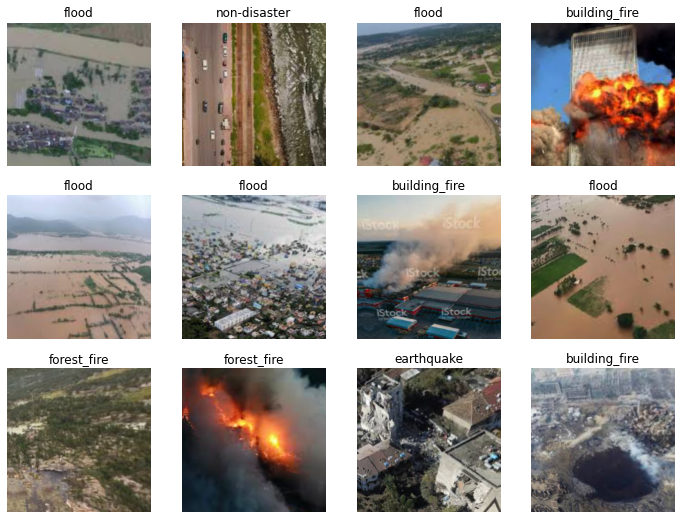

In [4]:
dls.show_batch(max_n=12,nrows=3)
dls.vocab

In [5]:
learn = cnn_learner(dls,models.densenet201,metrics=accuracy)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.524289,0.665098,0.803371,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.615959,0.619701,0.805243,00:19
1,0.501653,0.596225,0.814607,00:18
2,0.423743,0.553623,0.846442,00:18
3,0.333017,0.547178,0.859551,00:18
4,0.271273,0.558686,0.850187,00:18


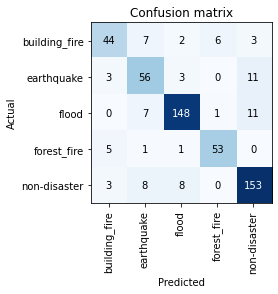

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [11]:
learn.predict("../input/disaster-1/Dataset/train/flood/2Q__ (1).jpg")[0]

'flood'